<a href="https://colab.research.google.com/github/Aravindraprasad/Data-Cleaning-Methods/blob/main/Data_Cleaning_Challenge_Handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# modules we'll use
import pandas as pd
import numpy as np
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aparnashastry/building-permit-applications-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/aparnashastry/building-permit-applications-data/versions/1


In [10]:
# Some data are missing by looking it
df = pd.read_csv('/content/Building_Permits.csv')
df.head()

<ipython-input-10-4697b1b70dd4>:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Building_Permits.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [11]:
df.shape
# get the number of missing data points per column
missing_value_count = df.isnull().sum()
missing_value_count[0:10]

,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Number Suffix,196684
Street Name,0
Street Suffix,2768


In [12]:
# Calculating the total missing values in percentage
totalcells = np.product(df.shape)
total_missing = missing_value_count.sum()

(total_missing/totalcells)* 100

# Per value missing in dataset

26.26002315058403

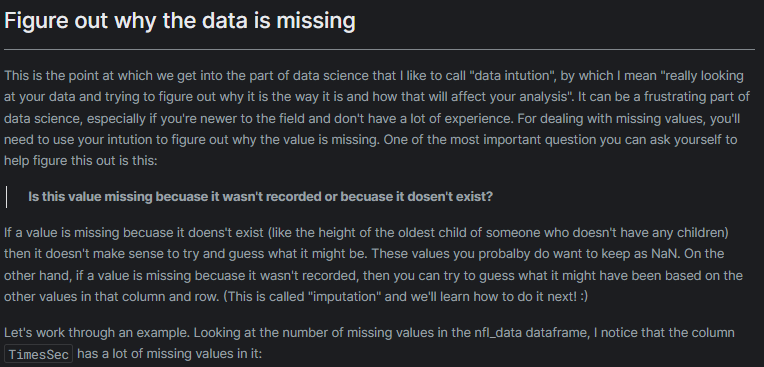

In [13]:
missing_value_count[0:10]

,0
Permit Number,0
Permit Type,0
Permit Type Definition,0
Permit Creation Date,0
Block,0
Lot,0
Street Number,0
Street Number Suffix,196684
Street Name,0
Street Suffix,2768


### Analyzing tips before filling NA

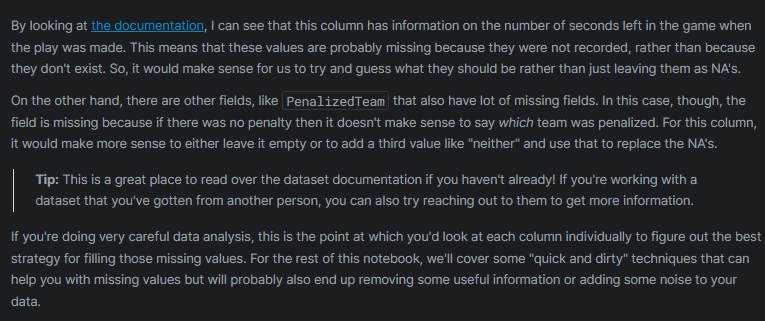

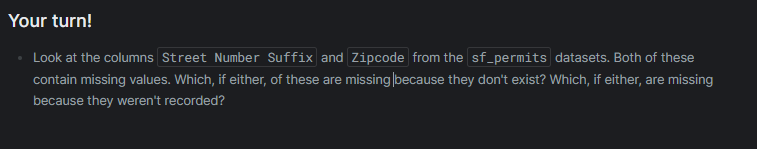

In [14]:
# remove all the rows that contain a missing value
df.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


Oh dear, it looks like that's removed all our data! 😱 This is because every row in our dataset had at least one missing value. We might have better luck removing all the columns that have at least one missing value instead.

In [15]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [16]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % df.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 43 

Columns with na's dropped: 12
